# Car Prices

🎯 This exercise consists of the data preparation and feature selection techniques you have learnt today to a new dataset.

👇 Download the Cars.csv and place it in the data folder. Load into this notebook as a pandas dataframe named df, and display its first 5 rows.

In [136]:
# Import all necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

In [137]:
# Load CSV into dataframe and display the 5 first rows
df = pd.read_csv("cars.csv")
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


ℹ️ The description of the dataset is available . Make sure to use refer to it through the exercise.

# Duplicates

👇 Remove the duplicates from the dataset if there are any. Overwite the dataframe `df`.

In [138]:
# Count and display duplicated values
print('Duplicated values : {}'.format(df.duplicated().sum()))
# No duplicated but if duplicates run this line :
# df = df.drop_duplicates()

Duplicated values : 0


# Missing values

👇 Locate missing values, investigate them, and apply the solutions below accordingly:

- Impute with most frequent
- Impute with median

Make changes effective in the dataset `df`.

In [139]:
# Count and display null values
print('Null values :\n{}'.format(df.isna().sum()))

# No missing values but if missing values run this line : 
# df = df.dropna() 

Null values :
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


## `carwidth`

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations of missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since there is less than 30% of missing values.
</details> 

In [140]:
# Check and display null values of "carwidth" column
print('Number of null values in carwidth : {}'.format(df['carwidth'].isnull().sum()))
# No np.nans

Number of null values in carwidth : 0


## `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is front, impute with the most frequent.
</details>

In [141]:
# Check and display null values of "enginelocation" column
print('Number of null values in carwidth : {}\n\nValues on engine location :\n{}'.format(df['enginelocation'].isnull().sum(), df['enginelocation'].value_counts()))
# No missing values so no changes 

Number of null values in carwidth : 0

Values on engine location :
front    202
rear       3
Name: enginelocation, dtype: int64


# Scaling

👇 Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scale
- Standard Scale

Replace the original columns by the transformed values.

## `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions and outliers. They must be Robust Scaled.
</details>

In [142]:
print('Values on peakrpm :\n{}'.format(df["peakrpm"].value_counts()))


Values on peakrpm :
5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
4500     7
5800     7
5250     7
5100     5
4150     5
4200     5
4350     4
4750     4
5900     3
4250     3
4400     3
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peakrpm, dtype: int64


In [143]:
# Function used to apply robust scaler on dataframe column
def robust_scale(df, column):
    transformer = RobustScaler().fit(df[[column]])
    df[column] = transformer.transform(df[[column]])
    return df

In [144]:
# Apply robust scaler on peakrpm column
df = robust_scale(df, "peakrpm")
print("Values of peakrpm after apply robust scaler :\n{}".format(df["peakrpm"].value_counts()))

Values of peakrpm after apply robust scaler :
 0.428571    37
-0.571429    36
-0.285714    27
 0.000000    23
 0.285714    13
 1.142857     9
-1.000000     7
 0.857143     7
 0.071429     7
-0.142857     5
-1.500000     5
-1.428571     5
-1.214286     4
-0.642857     4
 1.000000     3
-1.357143     3
-1.142857     3
 2.000000     2
-0.785714     1
 0.571429     1
 0.785714     1
-0.428571     1
 0.142857     1
Name: peakrpm, dtype: int64


In [145]:
# Apply robust scaler on carwidth column
df = robust_scale(df, "carwidth")
print("Values of carwidth after apply robust scaler :\n{}".format(df["carwidth"].value_counts()))

Values of carwidth after apply robust scaler :
-0.607143    24
 0.357143    23
-0.035714    15
-0.678571    11
-0.392857    10
 1.035714    10
-0.535714     9
 0.000000     8
-0.107143     7
-0.464286     6
 0.285714     6
 0.035714     6
 0.607143     6
 0.857143     5
 0.500000     5
 0.071429     4
 1.214286     4
-0.250000     4
-0.571429     3
 1.714286     3
 2.214286     3
 2.107143     3
-0.178571     3
 1.000000     2
 0.785714     2
-0.500000     2
 0.214286     2
 1.464286     2
-0.321429     2
 2.321429     1
 0.892857     1
 1.785714     1
-1.321429     1
 0.178571     1
-1.071429     1
 1.821429     1
 2.428571     1
 0.392857     1
-0.750000     1
-1.857143     1
 1.928571     1
 0.321429     1
 0.250000     1
 1.178571     1
Name: carwidth, dtype: int64


In [146]:
# Apply robust scaler on stroke column
df = robust_scale(df, "stroke")
print("Values of stroke after apply robust scaler :\n{}".format(df["stroke"].value_counts()))

Values of stroke after apply robust scaler :
 0.366667    20
-0.200000    14
-0.466667    14
-0.866667    14
 0.333333    13
-2.166667    11
 0.000000     9
 0.200000     9
 0.566667     8
-0.600000     6
-0.066667     6
 0.400000     6
-0.733333     6
 0.966667     6
-0.333333     6
 0.700000     6
 1.166667     5
 0.766667     5
 1.900000     4
 0.833333     4
 0.600000     4
-0.116667     4
 2.033333     3
-1.300000     3
-0.633333     2
 2.933333     2
-1.633333     2
-3.666667     2
-0.700000     2
-2.033333     2
-3.100000     1
-0.433333     1
-4.066667     1
-0.266667     1
-0.566667     1
-1.766667     1
-1.400000     1
Name: stroke, dtype: int64


## `curbweight`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

In [147]:
print('Values of curbweight column:\n{}'.format(df["curbweight"].value_counts()))

Values of curbweight column:
2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: curbweight, Length: 171, dtype: int64


In [148]:
# Apply standard scaler on curbweight column
scaler = StandardScaler()
transformer = scaler.fit(df[["curbweight"]])
df["curbweight"] = transformer.transform(df[["curbweight"]])
print('Values of curbweight column:\n{}'.format(df["curbweight"].value_counts()))

Values of curbweight column:
-0.328385    4
-1.227484    3
-0.540164    3
-1.090790    3
-0.280253    2
            ..
-0.357264    1
-0.438125    1
 0.534135    1
 0.703558    1
 0.975021    1
Name: curbweight, Length: 171, dtype: int64


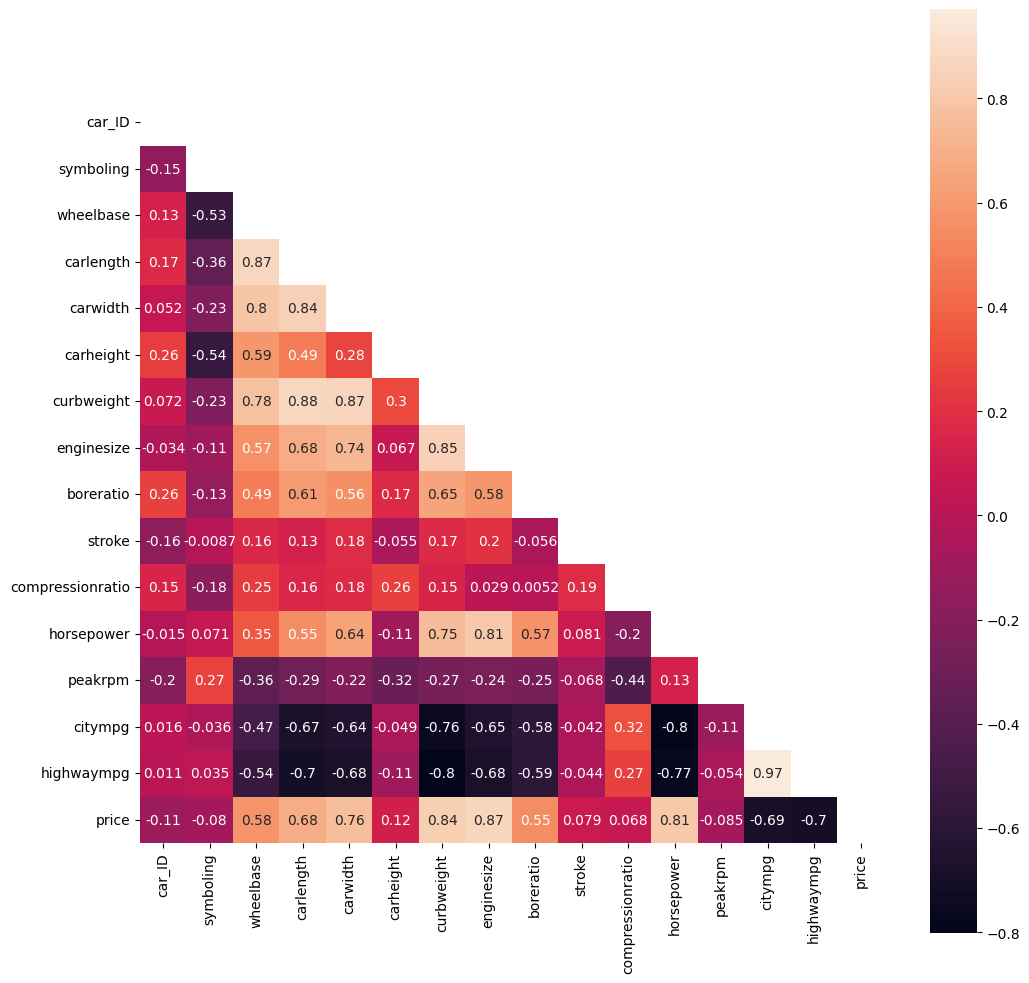

In [149]:
# Display correlation heatmap 
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 12))
sns.heatmap(corr, square=True, annot=True, mask=mask)
plt.show()

# Encoding

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One hot encoding
- Manual ordinal encoding

In the dataframe, replace the original features by their encoded version(s).

## `aspiration` & `enginelocation`

In [150]:
print("aspiration column values:\n{}\n\nenginelocation column values:\n{}".format(df["aspiration"].value_counts() , df["enginelocation"].value_counts()))

aspiration column values:
std      168
turbo     37
Name: aspiration, dtype: int64

enginelocation column values:
front    202
rear       3
Name: enginelocation, dtype: int64


In [151]:
# Function used to perform ordinal encoding on dataframe column
def ordinal_encoder(df, column):
    encoder = OrdinalEncoder()
    o_encoder = encoder.fit_transform(df[[column]])
    df = pd.concat([df, pd.DataFrame(o_encoder,columns=[f'{column}Encode'])], axis=1)
    df.dropna()
    df = df.drop(columns=column)
    return df

# Perform ordinal encoding on aspiration and enginelocation columns 
df = ordinal_encoder(df, "aspiration")
df = ordinal_encoder(df, "enginelocation")

print('aspirationEncode column values :\n{}\n\nenginelocationEncode column values :\n{}'.format(df["aspirationEncode"].value_counts(), df["enginelocationEncode"].value_counts()))

aspirationEncode column values :
0.0    168
1.0     37
Name: aspirationEncode, dtype: int64

enginelocationEncode column values :
0.0    202
1.0      3
Name: enginelocationEncode, dtype: int64


## `enginetype`

In [152]:
# Function used to perform one hot encoding on dataframe column 
def one_hot_encoder(df, column):
    encoder = OneHotEncoder(handle_unknown='ignore').fit_transform(df[[column]]).toarray()
    encoder = np.asmatrix(encoder)
    df = pd.concat([df, pd.DataFrame(encoder, columns=df[column].value_counts().index)], axis=1)
    df = df.drop(columns=column)
    df = df.dropna()
    return df

# Perform one hot encoding on enginetype column
df = one_hot_encoder(df, "enginetype")  

# Performing one hot encoding replaced enginetype column by 7 new columns 'ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor', 'dohcv'
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'doornumber', 'carbody',
       'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'aspirationEncode', 'enginelocationEncode',
       'ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor', 'dohcv'],
      dtype='object')


## `cylindernumber`

In [153]:
# Same process with the cylindernumber column which is replaced by 7 new columns : 'four', 'six', 'five', 'eight','two', 'three', 'twelve'
df = one_hot_encoder(df, "cylindernumber")
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'doornumber', 'carbody',
       'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'aspirationEncode', 'enginelocationEncode', 'ohc', 'ohcf',
       'ohcv', 'dohc', 'l', 'rotor', 'dohcv', 'four', 'six', 'five', 'eight',
       'two', 'three', 'twelve'],
      dtype='object')

## `price`

👇 Encode the target `price`.

In [154]:
# Apply min max scaler on price column
scaler = MinMaxScaler()
price_scaled = scaler.fit_transform(df["price"].to_numpy().reshape((-1, 1)))
df["price"] = price_scaled
print('Price column scaled values:\n{}'.format(df["price"].value_counts()))

Price column scaled values:
0.094409    2
0.103297    2
0.069013    2
0.094298    2
0.065960    2
           ..
1.000000    1
0.282632    1
0.006728    1
0.026588    1
0.434611    1
Name: price, Length: 189, dtype: int64


# Collinearity

👇 Perform a collinearity investigation on the dataset and remove unecessary features. Make changes effective in the dataframe `df`.

<div style='color:green'>You can take a look at the previous cell that displayed correlation heatmap</div>

In [155]:
# Get corr df created previsously in order to display correlation heatmap and use it to display correlation between 2 features
corr_df = corr.unstack().reset_index()
corr_df.columns = ["feature1", "feature2", "correlation"]
corr_df.sort_values(by="correlation", ascending=False, inplace=True)
corr_df = corr_df[corr_df["feature1"] != corr_df["feature2"]]

# We have choosen to keep only the columns where correlation is > 0.8
corr_df = corr_df[abs(corr_df['correlation']) > 0.8]
corr_df

,feature1,feature2,correlation
237,highwaympg,citympg,0.971337
222,citympg,highwaympg,0.971337
54,carlength,curbweight,0.877728
99,curbweight,carlength,0.877728
35,wheelbase,carlength,0.874587
50,carlength,wheelbase,0.874587
247,price,enginesize,0.874145
127,enginesize,price,0.874145
70,carwidth,curbweight,0.867032
100,curbweight,carwidth,0.867032


In [156]:
# Displayed columns that we want to keep after correlation 
corr_df["feature1"].unique()

array(['highwaympg', 'citympg', 'carlength', 'curbweight', 'wheelbase',
       'price', 'enginesize', 'carwidth', 'horsepower'], dtype=object)

ℹ️ Out of the highly correlated feature pairs, remove the one with less granularity.

# Base Modelling

👇 Cross validate a Logistic regression model. Save its score under variable name `base_model_score`.

In [157]:
df = df[list(corr_df["feature1"].unique())]
df = df.select_dtypes(exclude=['object'])
X = df.drop(columns="price")
y = df["price"]

# Create our train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Perform cross validation on X_train and y_train with LinearRegression model useto fit the data 
cv_results = cross_validate(LinearRegression(), X_train, y_train)
base_model_score = cv_results['test_score']
print('Test score = {}'.format(base_model_score))
# cv_results, 

Test score = [0.75403697 0.84735814 0.8176686  0.82423464 0.82689955]


# Feature Selection

👇 Perform feature permutation to remove the weak features from the feature set. With that strong feature set, cross-validate a new model, and save its score under variable name `strong_model_score`.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'highwaympg'),
  Text(1, 0, 'citympg'),
  Text(2, 0, 'carlength'),
  Text(3, 0, 'curbweight'),
  Text(4, 0, 'wheelbase'),
  Text(5, 0, 'enginesize'),
  Text(6, 0, 'carwidth'),
  Text(7, 0, 'horsepower')])

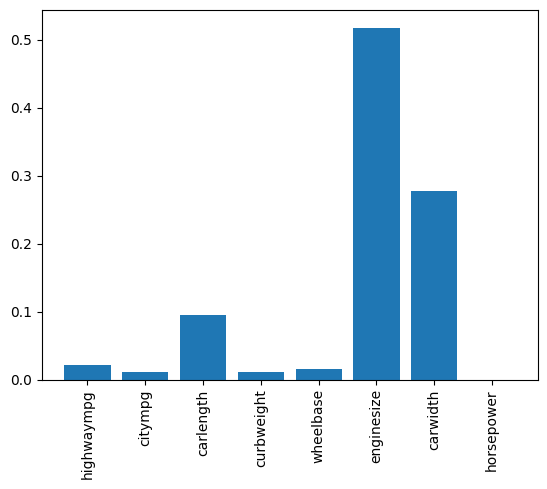

In [165]:
log_model = LinearRegression().fit(X_train, y_train)
permutation_score = permutation_importance(log_model, X_train, y_train, n_repeats=10)
permutation_score = pd.DataFrame(np.vstack((X_train.columns, permutation_score.importances_mean)).T)
permutation_score.columns = ["feature", "score"]
permutation_score.sort_values(by="score", ascending=False)

# Temporary solution need to be validate
# print(permutation_score)
plt.bar(permutation_score['feature'],permutation_score['score'])
plt.xticks(rotation='vertical')
# plt.scatter(permutation_score)

In [ ]:
X = df[["enginesize", "carwidth"]]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

cv_results = cross_validate(LinearRegression(), X_train, y_train)
base_model_score = cv_results['test_score']
base_model_score

array([0.74594975, 0.86942094, 0.80028933, 0.79149497, 0.89458227])

# 🏁